In [ ]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu_speed(n_list=[100,500,1000,2000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha1,1), (p_alpha1,4)],
              show_progress=True,
              std=1):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k!=1 else print(f"RCIT (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)



        for i, n in enumerate(n_list):

    
            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"t={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                
                np.random.seed(sed)
                random.seed(sed)

                dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian',noise_dis='t',noise_std=std)))
                dataII = np.hstack((generate_samples(n=n,indp='N',z_dis='gaussian',noise_dis='t',noise_std=std)))

                if k == 1:
                    obj_ECIT = ECIT(dataI, rcit, p_ensemble, k=1)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, rcit, p_ensemble, k=1)
                    pII = obj_ECIT([0], [1], [2])
                elif k == 0:

                    ########################################

                    if n <= 6000:

                    ########################################
                    
                        obj_ECIT = ECIT(dataI, kcit, p_ensemble, k=1)
                        pI = obj_ECIT([0], [1], [2])
                        obj_ECIT = ECIT(dataII, kcit, p_ensemble, k=1)
                        pII = obj_ECIT([0], [1], [2])
                    else:
                        pI = 0
                        pII = 0

                elif k<100:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, k)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, k)
                    pII = obj_ECIT([0], [1], [2])
                    
                else:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, int(n/k))
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, int(n/k))
                    pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        if k==0:
            eI, eII, tim = result
            num_ = np.sum(np.array(eI)<1)
            eI = eI[:num_]
            eII = eII[:num_]
            tim = tim[:num_]
            result = [eI, eII, tim]

        key_name = f"Ensemble KCIT (k={k}, {p_ensemble.__name__})" if k != 1 else f"RCIT"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)
        if len(eI) != len(n_list):
            n_list_ = n_list[:len(eI)]
            ax_eI.plot(n_list_, eI, label=label)
            ax_eII.plot(n_list_, eII)
            ax_eSum.plot(n_list_, eSum)
            ax_tim.plot(n_list_, tim)
        else:
            ax_eI.plot(n_list, eI, label=label)
            ax_eII.plot(n_list, eII)
            ax_eSum.plot(n_list, eSum)
            ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
ensembles = [(p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=1000, cit=kcit, ensembles=ensembles, std=1)
show_results(results, ensembles, n_list)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 407.39it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [11:43<00:00,  7.03s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [10:57<00:00,  6.58s/it]


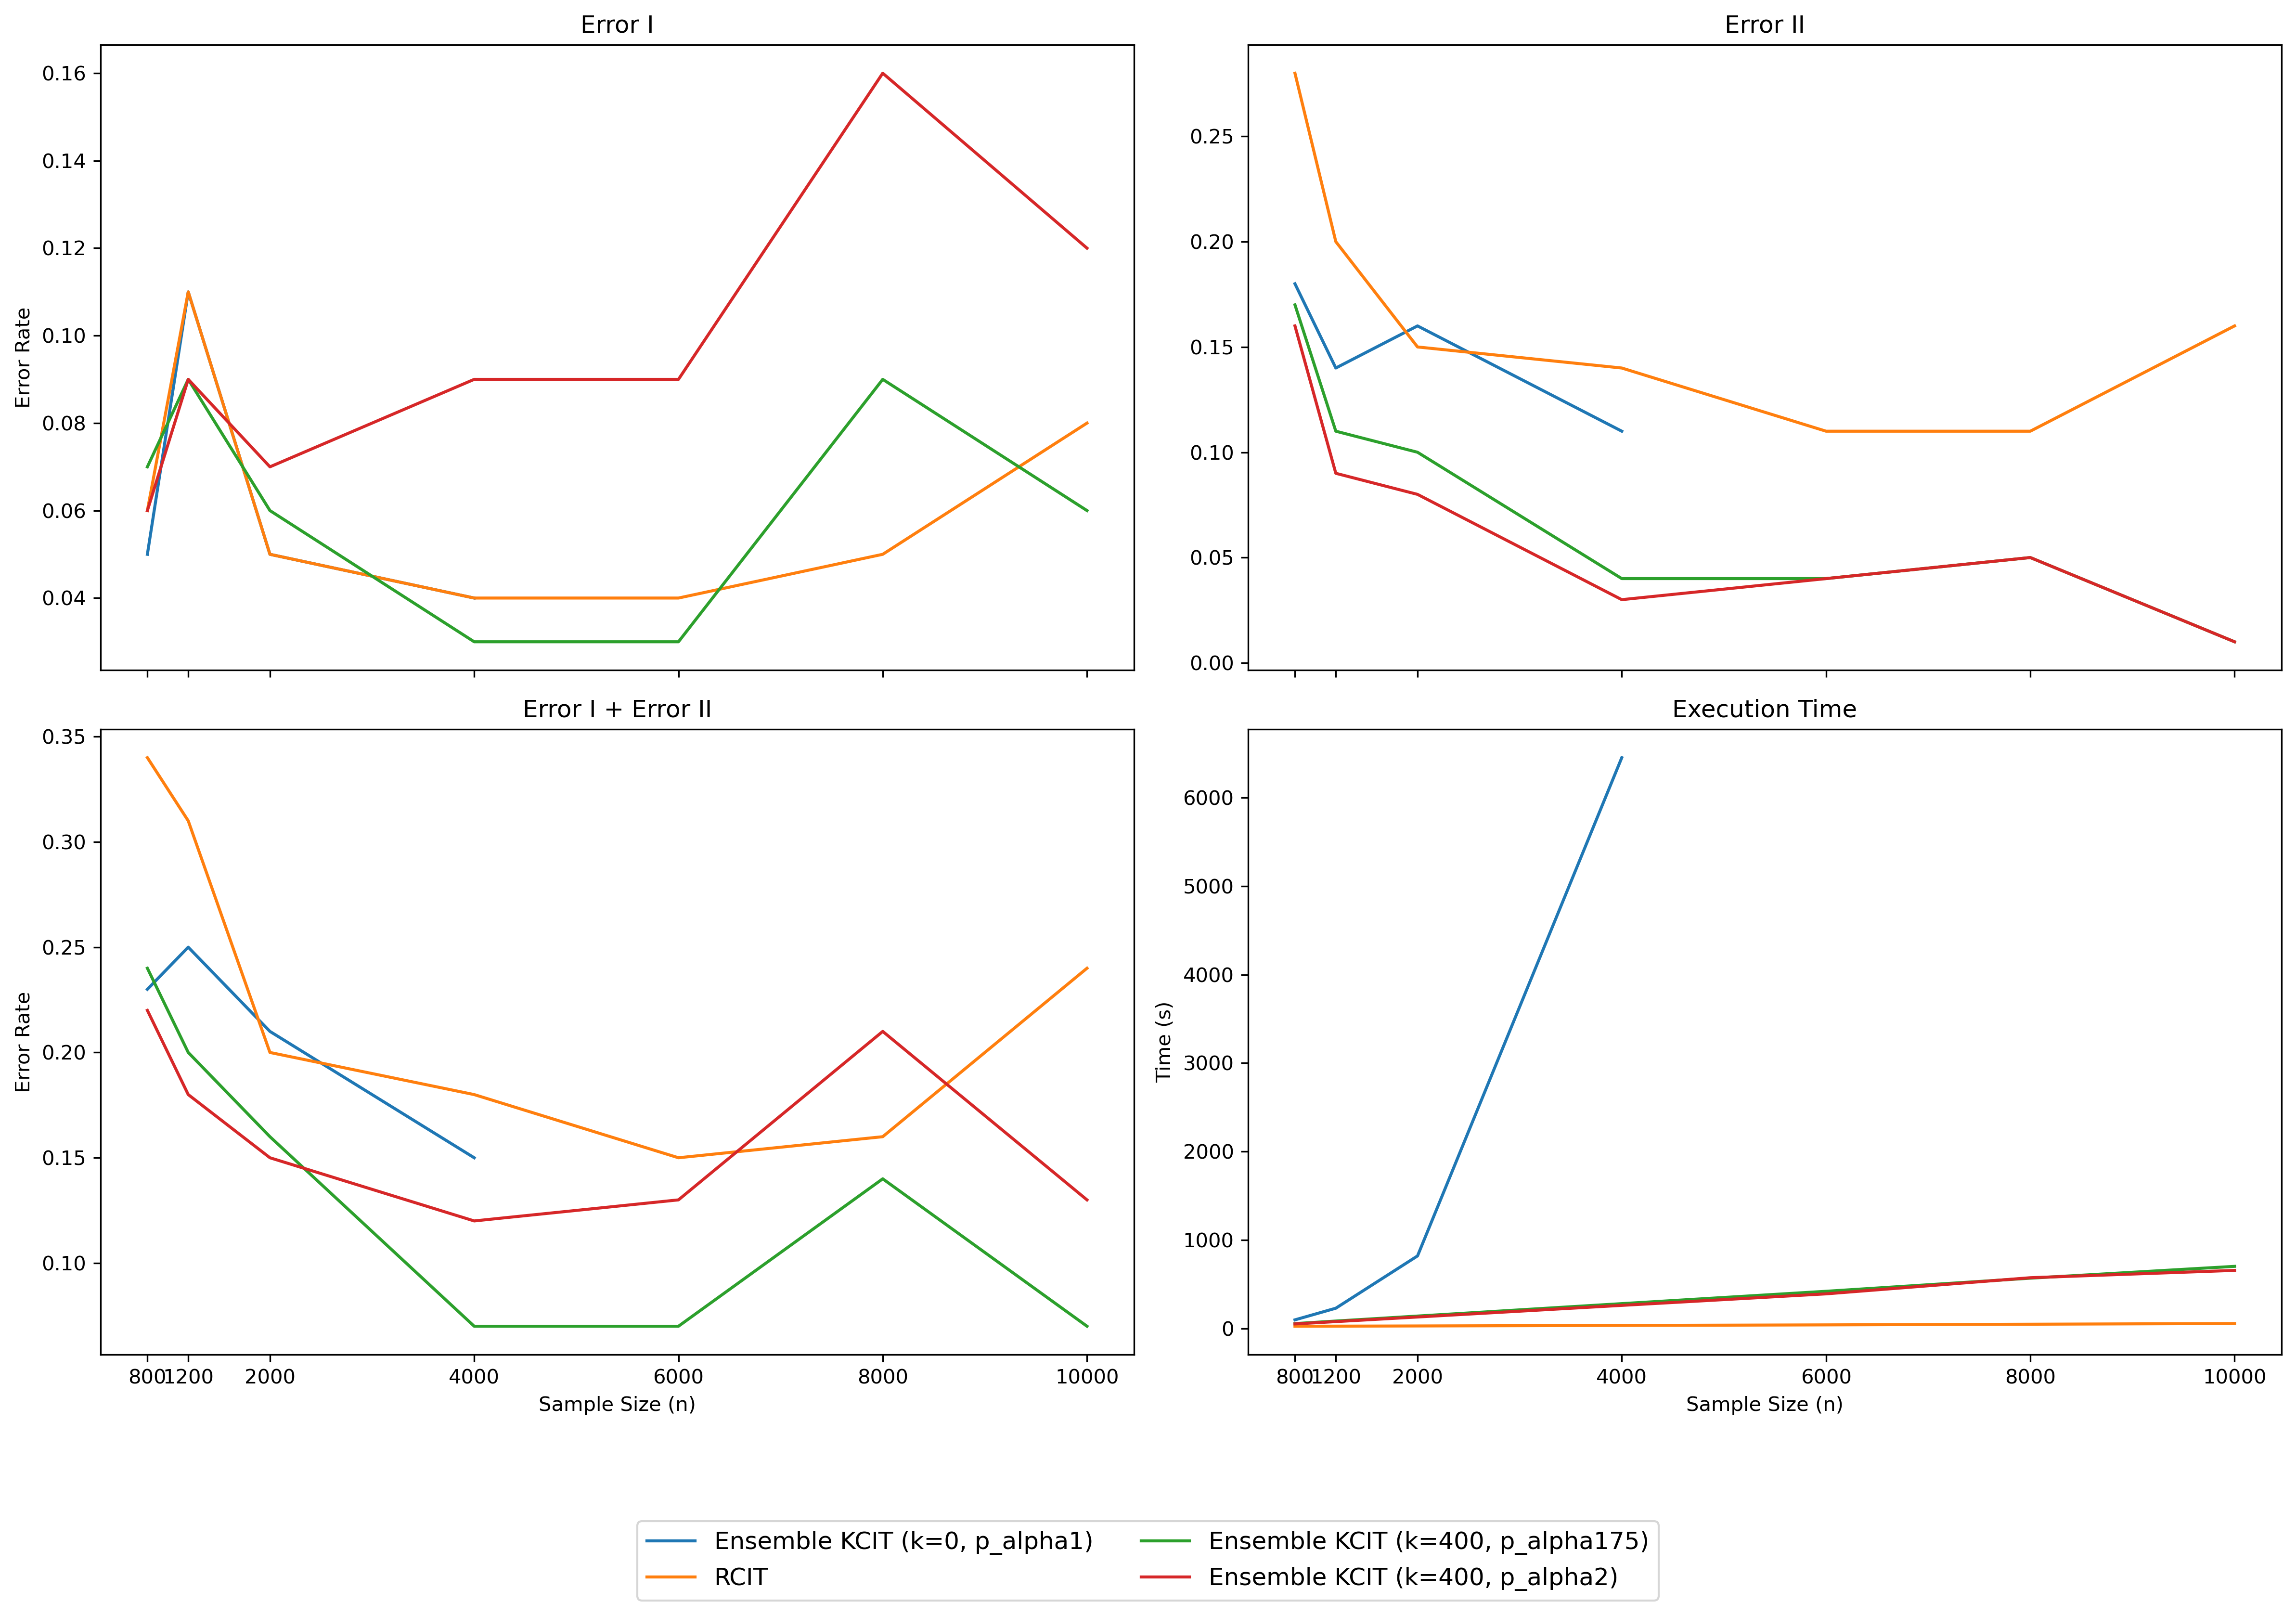

[[[0.05, 0.11, 0.05, 0.04, 1.0, 1.0, 1.0],
  [0.18, 0.14, 0.16, 0.11, 0.0, 0.0, 0.0],
  [98.97983479499817,
   230.5021390914917,
   821.1550741195679,
   6450.311244010925,
   0.1763300895690918,
   0.20721101760864258,
   0.24618887901306152]],
 [[0.06, 0.11, 0.05, 0.04, 0.04, 0.05, 0.08],
  [0.28, 0.2, 0.15, 0.14, 0.11, 0.11, 0.16],
  [26.963243007659912,
   27.963475942611694,
   29.974894046783447,
   35.90707206726074,
   42.13925313949585,
   49.73381996154785,
   57.62310314178467]],
 [[0.07, 0.09, 0.06, 0.03, 0.03, 0.09, 0.06],
  [0.17, 0.11, 0.1, 0.04, 0.04, 0.05, 0.01],
  [56.66554093360901,
   85.50367522239685,
   141.85156106948853,
   282.1808876991272,
   421.68227910995483,
   569.7888948917389,
   703.3239741325378]],
 [[0.06, 0.09, 0.07, 0.09, 0.09, 0.16, 0.12],
  [0.16, 0.09, 0.08, 0.03, 0.04, 0.05, 0.01],
  [52.933664083480835,
   79.11263513565063,
   131.2038860321045,
   262.5682873725891,
   392.63283491134644,
   574.9727149009705,
   657.7797818183899]]]

In [ ]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=1)
show_results(results, ensembles, n_list)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 396.08it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [00:56<00:00,  1.76it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [11:25<00:00,  6.86s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [10:37<00:00,  6.38s/it]


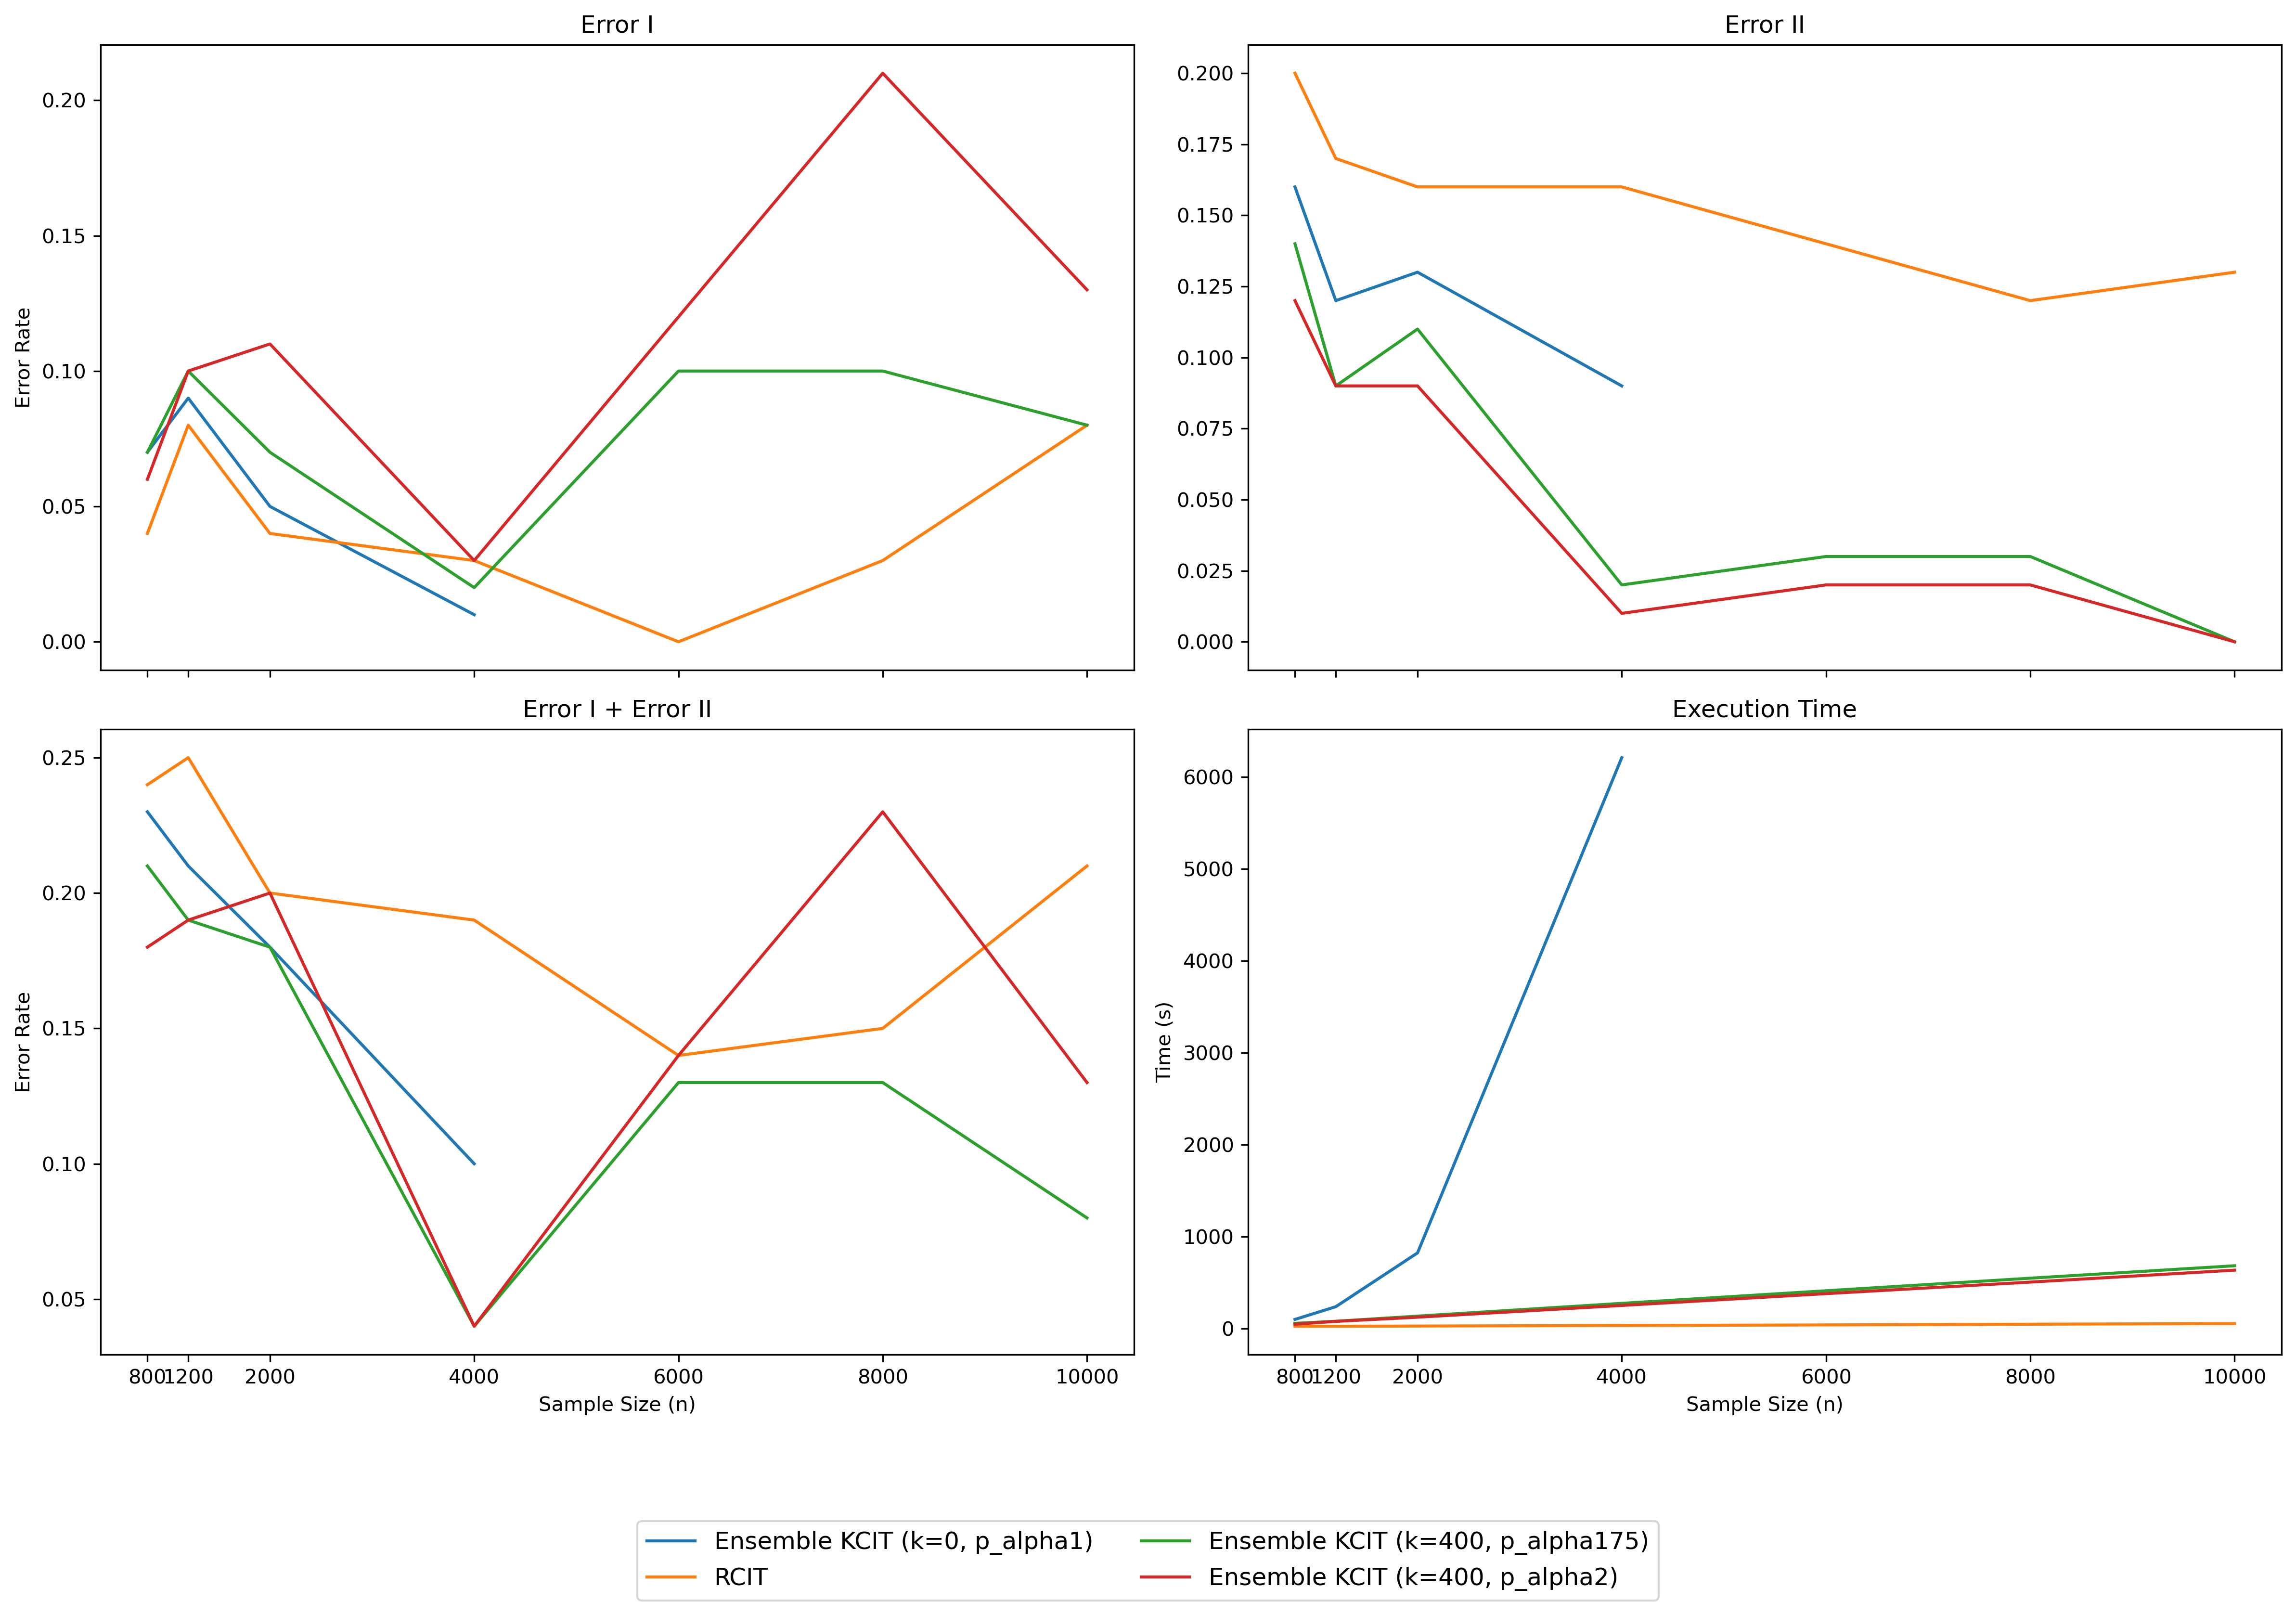

[[[0.07, 0.09, 0.05, 0.01, 1.0, 1.0, 1.0],
  [0.16, 0.12, 0.13, 0.09, 0.0, 0.0, 0.0],
  [101.95388078689575,
   240.53987908363342,
   825.5983390808105,
   6212.27688908577,
   0.19400501251220703,
   0.2182018756866455,
   0.2531571388244629]],
 [[0.04, 0.08, 0.04, 0.03, 0.0, 0.03, 0.08],
  [0.2, 0.17, 0.16, 0.16, 0.14, 0.12, 0.13],
  [27.993515014648438,
   28.062257051467896,
   30.09540820121765,
   36.08236598968506,
   42.1527419090271,
   50.156179904937744,
   56.698724031448364]],
 [[0.07, 0.1, 0.07, 0.02, 0.1, 0.1, 0.08],
  [0.14, 0.09, 0.11, 0.02, 0.03, 0.03, 0.0],
  [59.31994605064392,
   82.27275490760803,
   137.87166213989258,
   276.9033648967743,
   413.8213448524475,
   550.4725458621979,
   685.7716119289398]],
 [[0.06, 0.1, 0.11, 0.03, 0.12, 0.21, 0.13],
  [0.12, 0.09, 0.09, 0.01, 0.02, 0.02, 0.0],
  [50.39029002189636,
   80.64857006072998,
   126.0884530544281,
   254.00260210037231,
   382.45216178894043,
   507.9654459953308,
   637.9501130580902]]]

In [2]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=0.75)
show_results(results, ensembles, n_list)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 427.95it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [00:56<00:00,  1.76it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [11:38<00:00,  6.99s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [10:35<00:00,  6.35s/it]


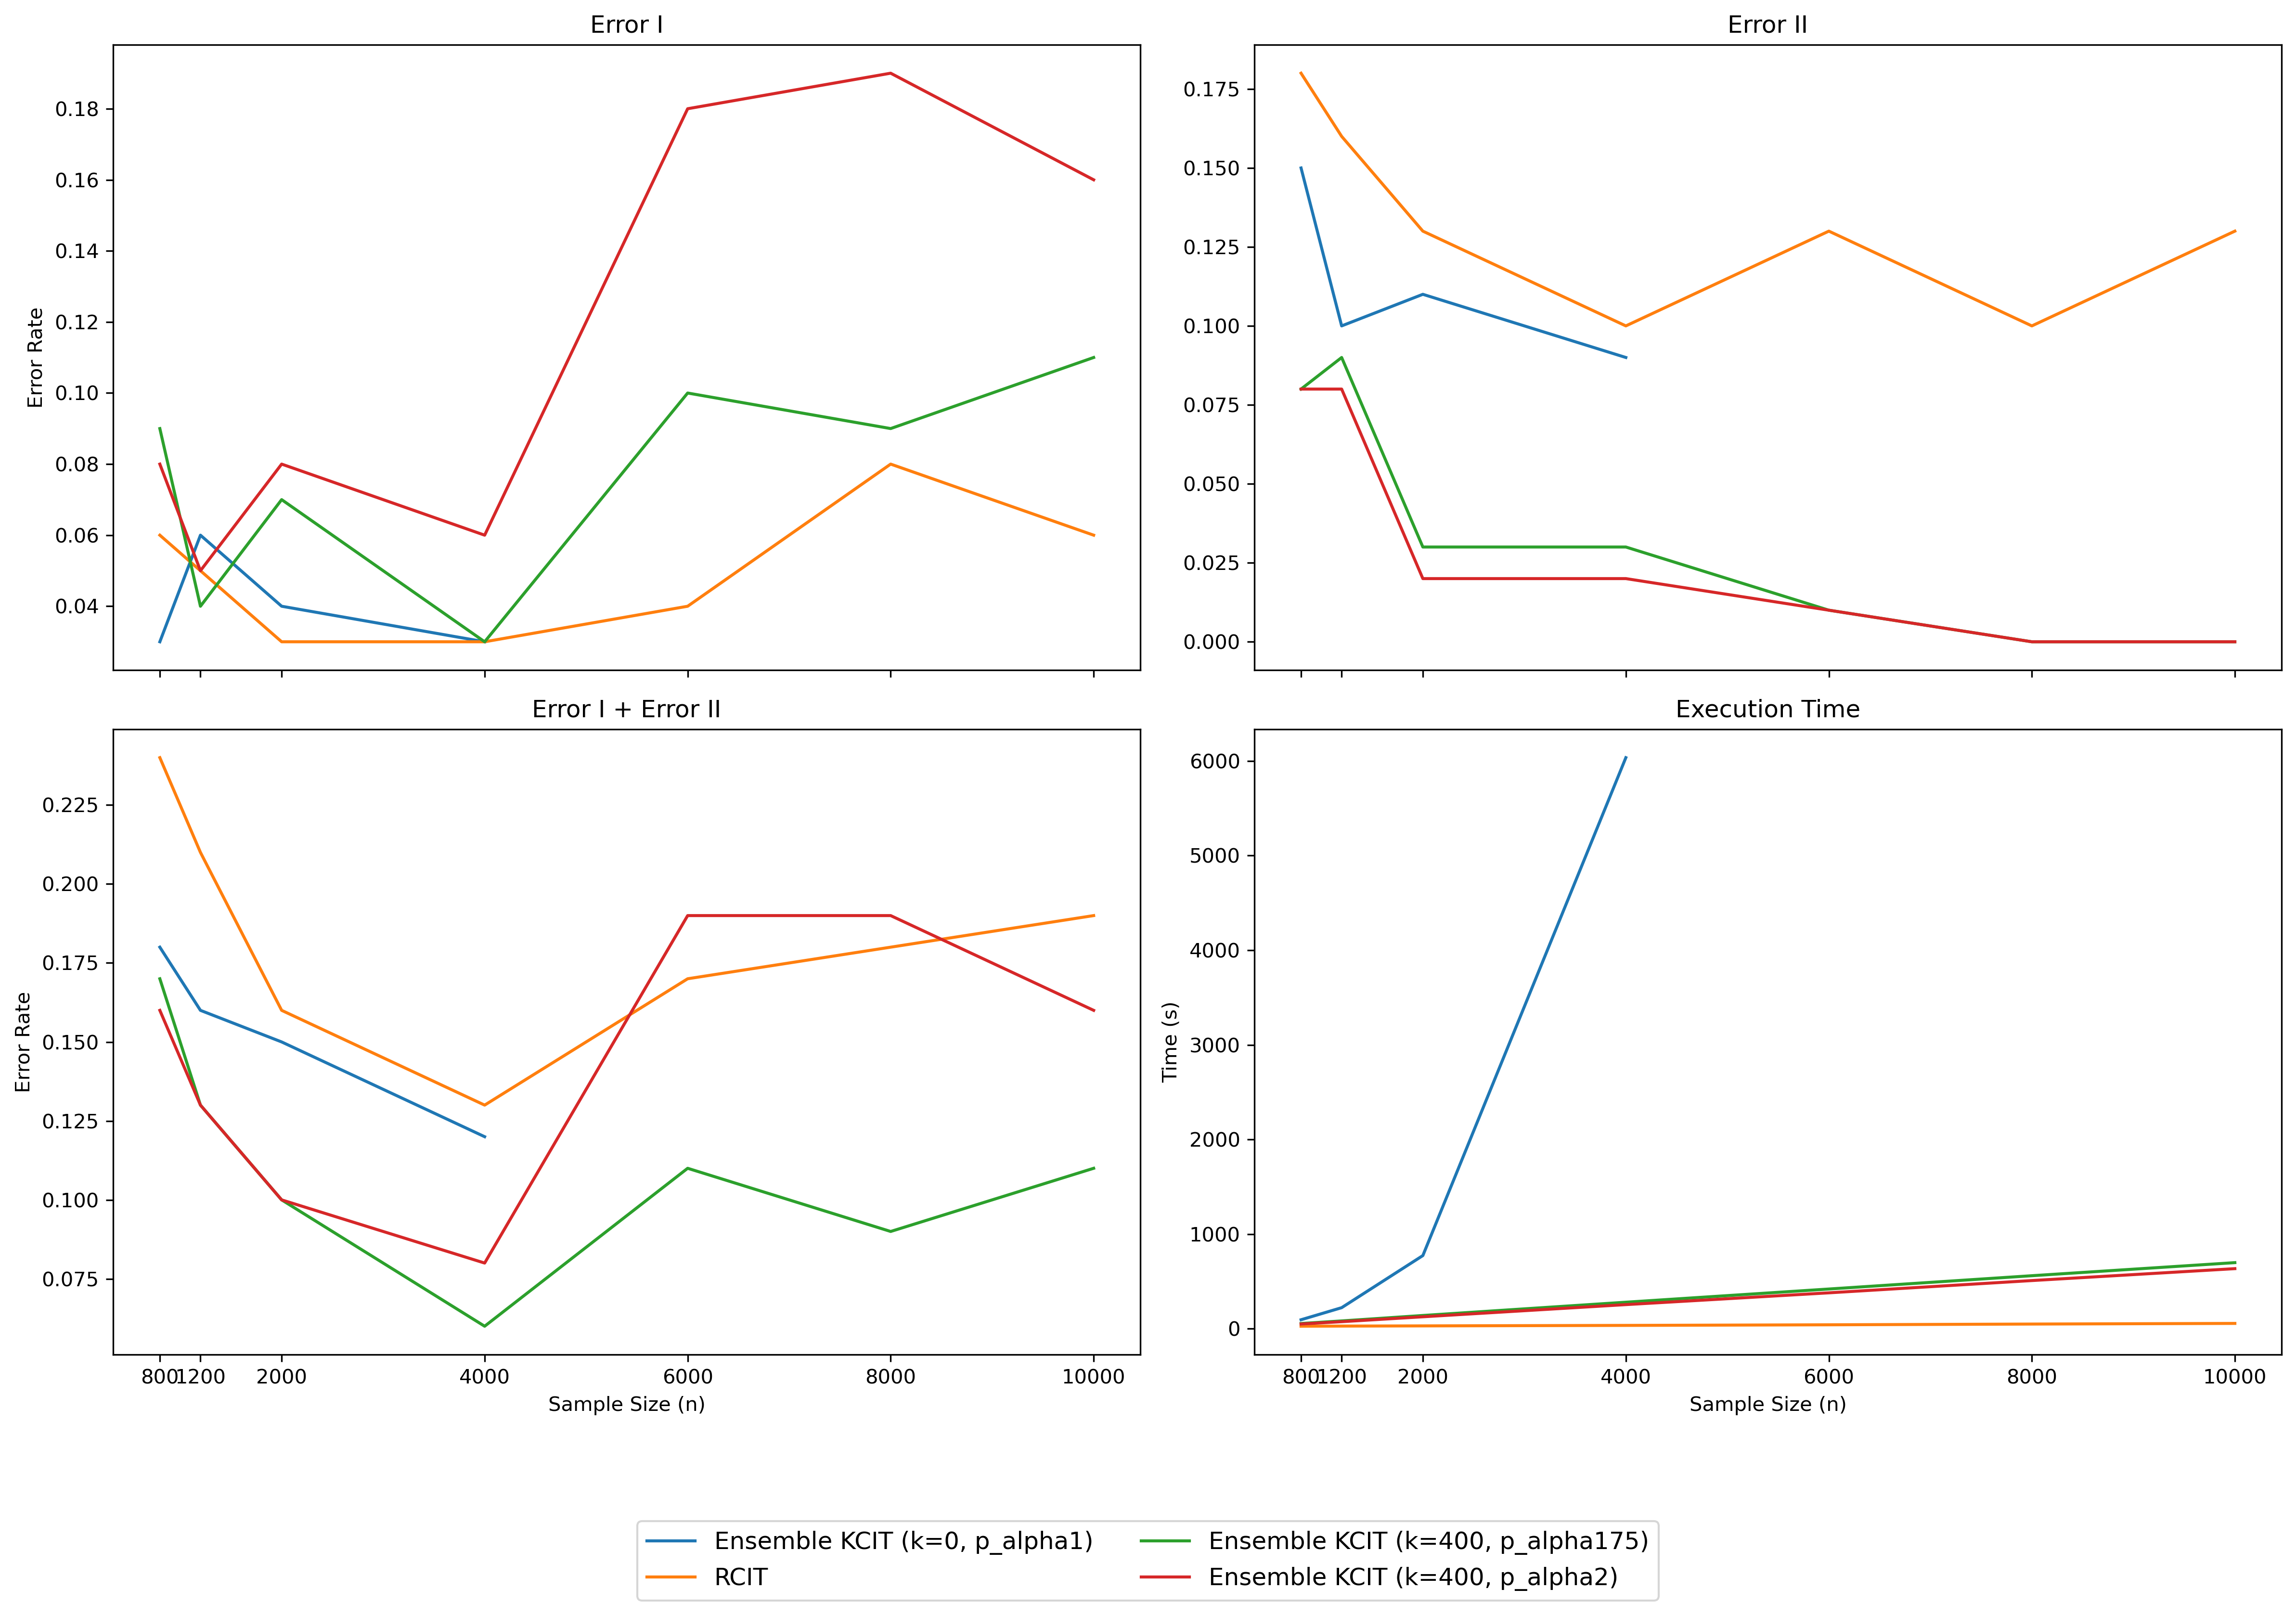

[[[0.03, 0.06, 0.04, 0.03, 1.0, 1.0, 1.0],
  [0.15, 0.1, 0.11, 0.09, 0.0, 0.0, 0.0],
  [95.4410810470581,
   223.0008099079132,
   773.4357266426086,
   6034.209801912308,
   0.19716501235961914,
   0.20578598976135254,
   0.2343730926513672]],
 [[0.06, 0.05, 0.03, 0.03, 0.04, 0.08, 0.06],
  [0.18, 0.16, 0.13, 0.1, 0.13, 0.1, 0.13],
  [27.003804922103882,
   28.571177005767822,
   30.59494709968567,
   35.825499057769775,
   42.13015127182007,
   49.979763984680176,
   56.772018909454346]],
 [[0.09, 0.04, 0.07, 0.03, 0.1, 0.09, 0.11],
  [0.08, 0.09, 0.03, 0.03, 0.01, 0.0, 0.0],
  [55.65061116218567,
   83.03358006477356,
   140.57167315483093,
   280.7483220100403,
   420.17714500427246,
   560.7152080535889,
   698.8987820148468]],
 [[0.08, 0.05, 0.08, 0.06, 0.18, 0.19, 0.16],
  [0.08, 0.08, 0.02, 0.02, 0.01, 0.0, 0.0],
  [50.34978199005127,
   75.00614094734192,
   126.81596398353577,
   255.40625309944153,
   379.9342157840729,
   509.46684169769287,
   635.411602973938]]]

In [3]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=0.5)
show_results(results, ensembles, n_list)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 434.09it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [11:13<00:00,  6.74s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [10:37<00:00,  6.38s/it]


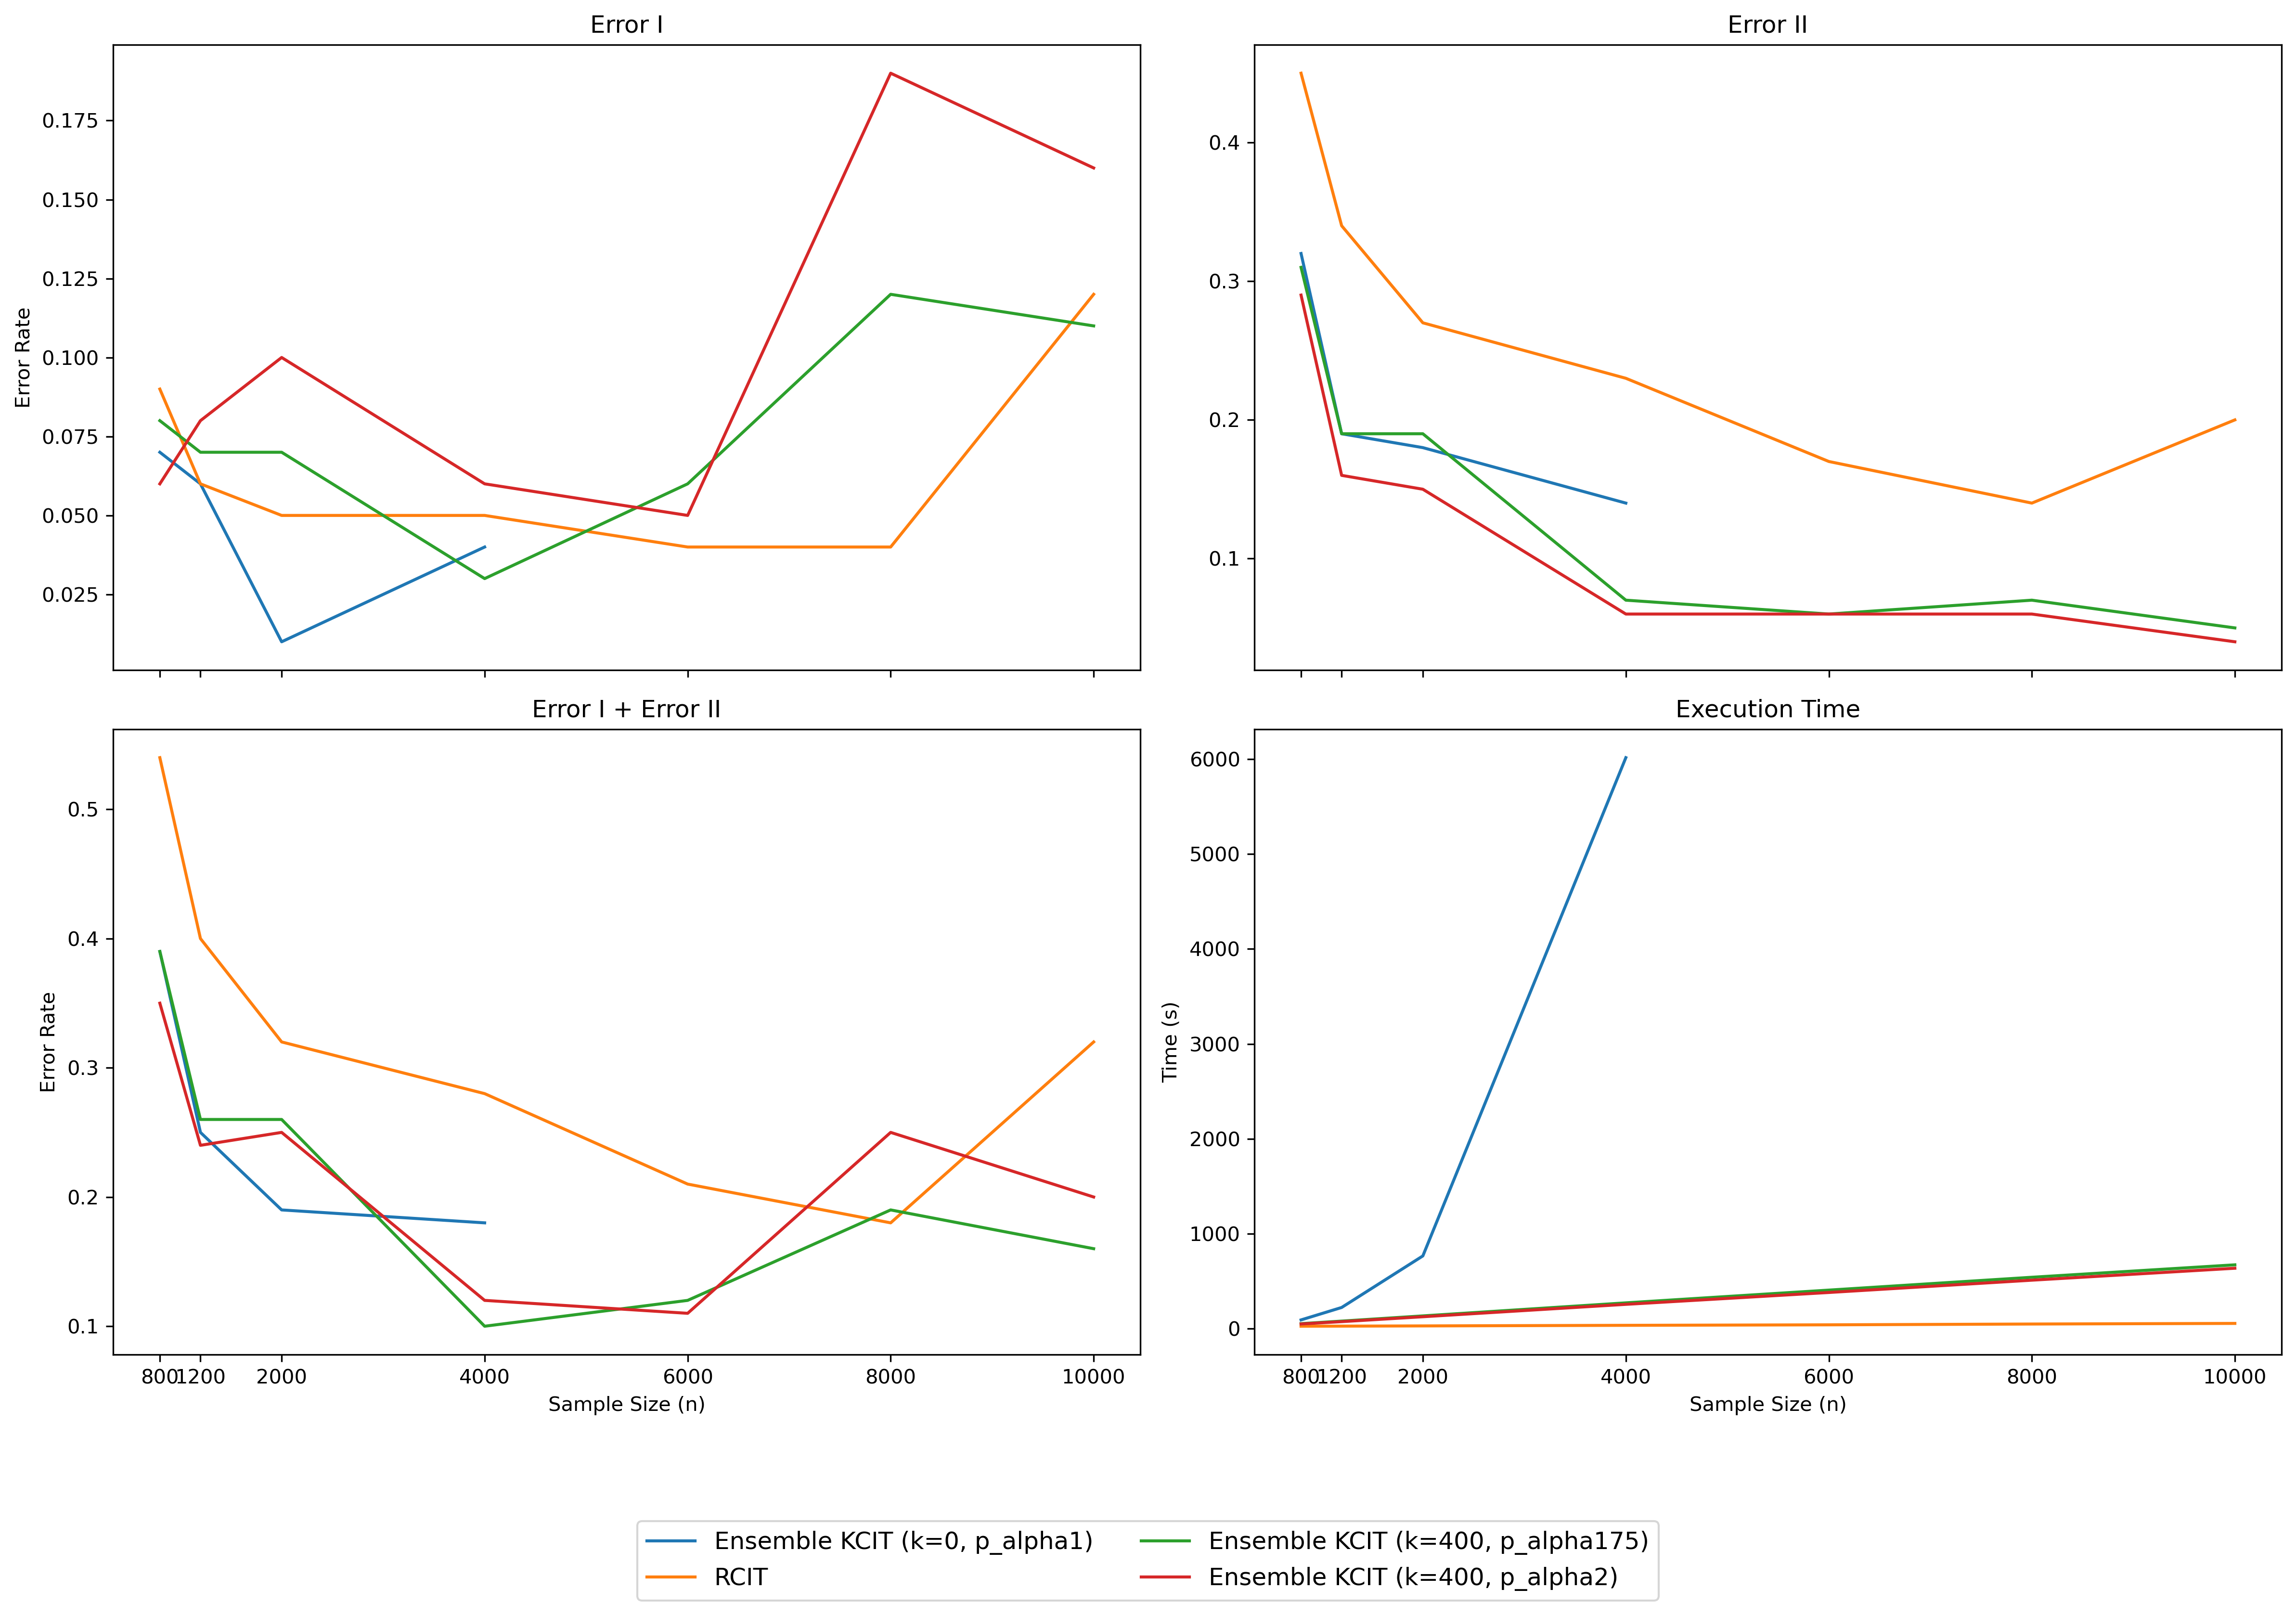

[[[0.07, 0.06, 0.01, 0.04, 1.0, 1.0, 1.0],
  [0.32, 0.19, 0.18, 0.14, 0.0, 0.0, 0.0],
  [93.42820835113525,
   224.40325093269348,
   767.279461145401,
   6014.760360240936,
   0.17068195343017578,
   0.2001500129699707,
   0.23101067543029785]],
 [[0.09, 0.06, 0.05, 0.05, 0.04, 0.04, 0.12],
  [0.45, 0.34, 0.27, 0.23, 0.17, 0.14, 0.2],
  [26.92515802383423,
   28.009965658187866,
   30.267933130264282,
   36.4853880405426,
   41.73836421966553,
   50.12733197212219,
   56.637640953063965]],
 [[0.08, 0.07, 0.07, 0.03, 0.06, 0.12, 0.11],
  [0.31, 0.19, 0.19, 0.07, 0.06, 0.07, 0.05],
  [53.99966812133789,
   80.89634203910828,
   135.74266695976257,
   273.0642490386963,
   407.3597848415375,
   542.5727598667145,
   673.5293171405792]],
 [[0.06, 0.08, 0.1, 0.06, 0.05, 0.19, 0.16],
  [0.29, 0.16, 0.15, 0.06, 0.06, 0.06, 0.04],
  [50.49167323112488,
   75.26677894592285,
   126.83216404914856,
   257.48577404022217,
   382.3902690410614,
   511.84694385528564,
   637.7046368122101]]]

In [4]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=1.5)
show_results(results, ensembles, n_list)
results